## importing the dependencies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

## Data collection and preprocessing

In [5]:
car_data = pd.read_csv('car data.csv')

In [6]:
car_data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
# rows and cols
car_data.shape

(301, 9)

In [10]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
print(car_data.Fuel_Type.value_counts())
print('---------------------------------')
print(car_data.Seller_Type.value_counts())
print('---------------------------------')
print(car_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
---------------------------------
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
---------------------------------
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [23]:
# encoding the categorical data for Fuel_Type
car_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2,}},inplace=True)

# encoding the categorical data for Seller
car_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding the categorical data for Transmission
car_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [24]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
# Splitting the data into Train and Test

In [26]:
x=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [27]:
x

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...
296,2016,11.60,33988,1,0,0,0
297,2015,5.90,60000,0,0,0,0
298,2009,11.00,87934,0,0,0,0
299,2017,12.50,9000,1,0,0,0


In [28]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [29]:
x.shape

(301, 7)

In [31]:
y.shape

(301,)

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=2)

## Model Training

## 1.Linear Regression

In [33]:
#Linear Regression model
lin_reg = LinearRegression()

In [34]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
# prediction on Training data
train_data_pred = lin_reg.predict(x_train)

# R square error
error_score = metrics.r2_score(y_train,train_data_pred)
print(error_score)

0.8799451660493716


## visualize the actual and predicted prices

<function matplotlib.pyplot.show(close=None, block=None)>

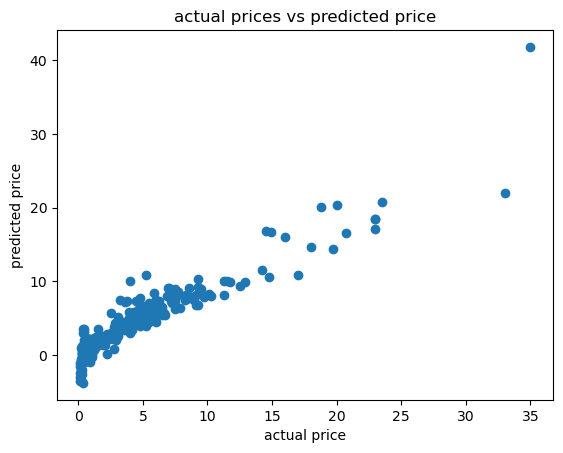

In [37]:
plt.scatter(y_train,train_data_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("actual prices vs predicted price")
plt.show

In [40]:
# Test data
test_data_pred = lin_reg.predict(x_test)

In [41]:
error_score = metrics.r2_score(y_test,test_data_pred)
print(error_score)

0.836576671502587


<function matplotlib.pyplot.show(close=None, block=None)>

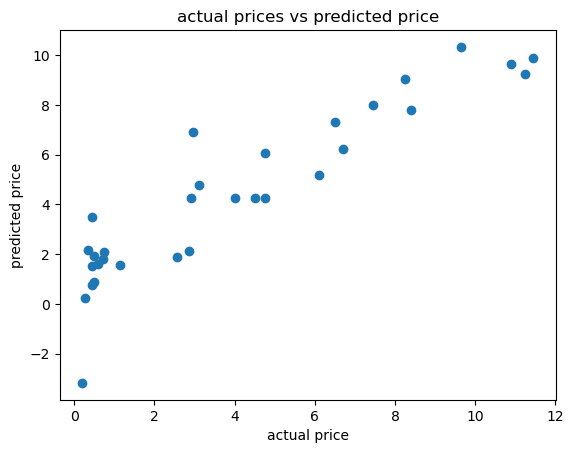

In [42]:
plt.scatter(y_test,test_data_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("actual prices vs predicted price")
plt.show

## 2.Lasso Regression

In [43]:
lasso_reg = Lasso()

In [45]:
lasso_reg.fit(x_train,y_train)

Lasso()

In [46]:
train_data_pred = lasso_reg.predict(x_train)

# R square error
error_score = metrics.r2_score(y_train,train_data_pred)
print(error_score)

0.8427856123435794


<function matplotlib.pyplot.show(close=None, block=None)>

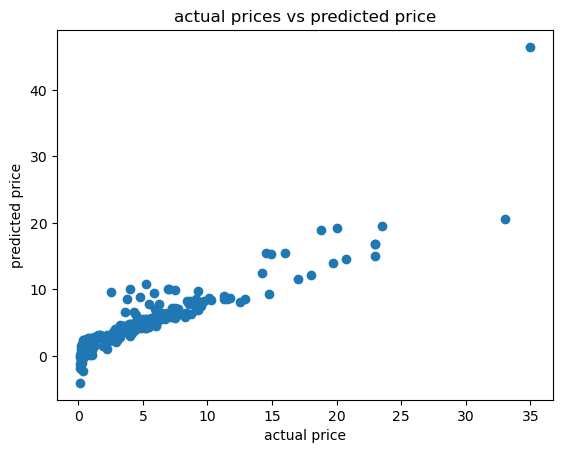

In [48]:
plt.scatter(y_train,train_data_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("actual prices vs predicted price")
plt.show

In [52]:
test_data_pred = lasso_reg.predict(x_test)

error_score = metrics.r2_score(y_test,test_data_pred)
print(error_score)

0.8709167941173195


<function matplotlib.pyplot.show(close=None, block=None)>

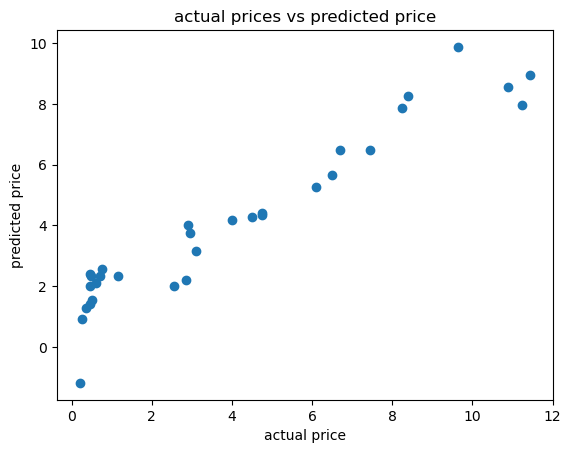

In [53]:
plt.scatter(y_test,test_data_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title("actual prices vs predicted price")
plt.show